# Clase 16 - Matriz de gráficos

In [2]:
# Importo librerías
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Cargar `dataset`

In [4]:
dataset_comidas = pd.read_csv("datasets/tips.csv")
dataset_iris = pd.read_csv("datasets/iris.csv")

El primer dataset contiene 244 muestras de pagos de comida en un restaurante. Cada ítem contiene información sobre el total pagado, la propina, el momento temporal, etc...

In [5]:
dataset_comidas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


El segundo *dataset* contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

In [6]:
dataset_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Matriz de gráficos

Para crear una matriz de gráficos, hay varias alternativas. Para crear su versión más simple que separa un *dataset* en distintos grupos dependiendo de valores de sus atributos, se puede hacer uso de la clase `FacetGrid`.

`FacetGrid` permite crear una matriz de visualizaciones a partir de un *dataset* y aplicar una función de visualización en cada celda:

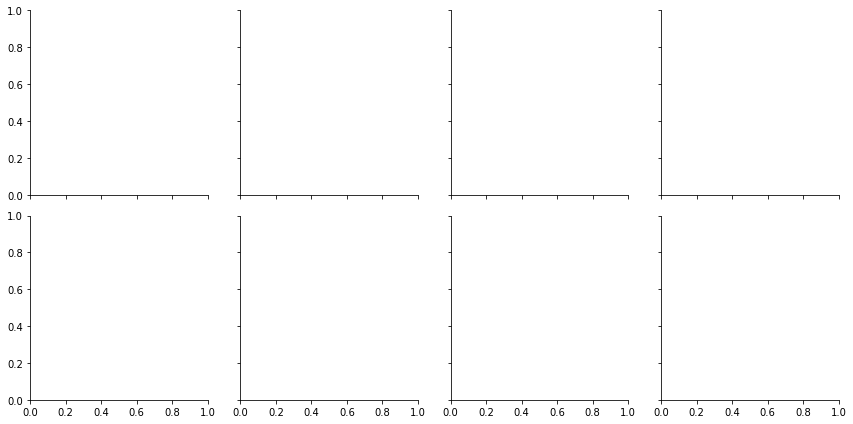

In [7]:
# Con FacetGrid se crea la matriz y específica sus dimensiones a partir del dataset
# Se le entrega el dataset y específica que:
# - en las columnas iran los valores del atributo day
# - en las filas iras los valores del atributo time
g = sns.FacetGrid(dataset_comidas, col="day", row="time")

`FacetGrid` por si solo crea la matriz y la separación del *dataset* por valores. Para graficar, se hace uso del método `map` se puede especificar la función de visualización a usar en cada celda.

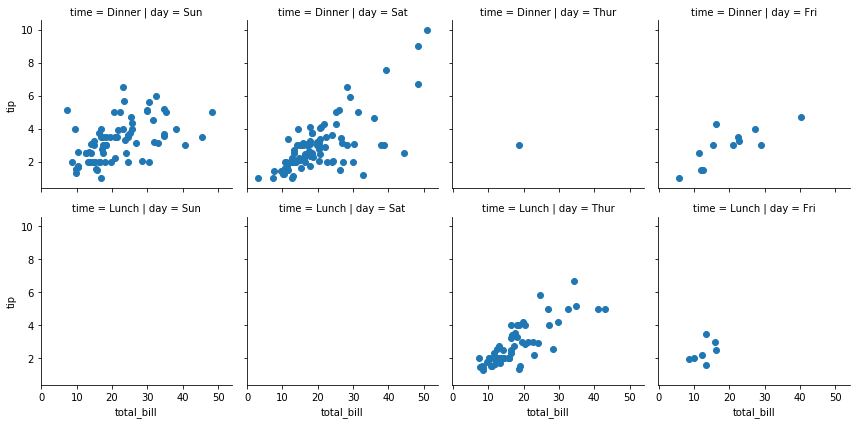

In [8]:
# Se vuelve a crear la matriz con los mismos atributos como columnas y filas
g = sns.FacetGrid(dataset_comidas, col="day", row="time")

# Al llamar al método map se le entrega una función de visualización, como plt.scatter
# El resto de los argumentos corresponden a los atributos propios del gráficos de dispersión correspondiente
# total_bill en el eje X, y tip en el eje Y
g.map(plt.scatter, "total_bill", "tip")

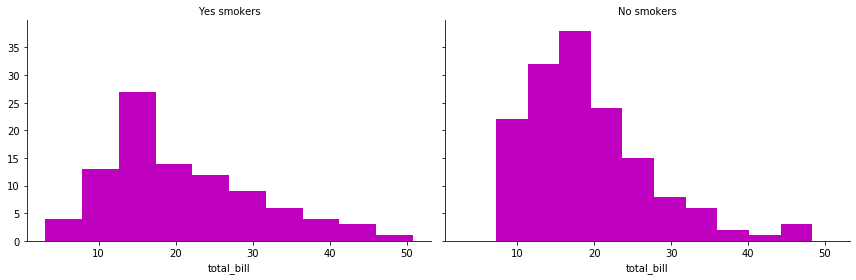

In [9]:
# Al crear la matriz, se puede personalizar más:
# - al solo especificar un atributo de columna y no de fila, crea una matriz unidimensional.
# - col_order permite específicar el orden en que apareceran las columnas
# - height específica la altura de cada celda de gráfico
# - aspect específica la relación entre altura y ancho de cada celda
g = sns.FacetGrid(dataset_comidas, col="smoker", col_order=["Yes", "No"], height=4, aspect=1.5)

# Se usa plt.hist como método de visualización, que también recibe más argumentos para el gráfico
g = g.map(plt.hist, "total_bill", color="m")

# Hay métodos que permiten más personalización
# set_titles permite específicar personalizar como se verán los títulos de cada celda
g.set_titles("{col_name} smokers")

Existen funciones más especializadas que permiten la distribución matricial directamente como `lmplot` y `catplot`.

`lmplot` permite visualizar gráficos de dispersión en conjunto a sus respectivas rectas de regresión en matrices de gráficos.

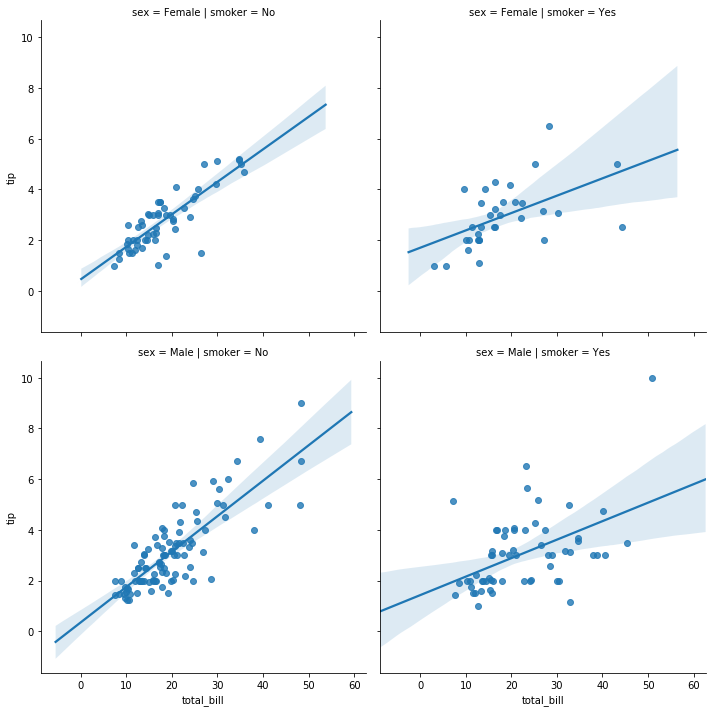

In [10]:
# x e y específican los atributos que se codificaran en los gráficos de dispersión
# col y row son análogos a su uso en FacetGrid para crear la matriz
# y data específica el dataset a utilizar
g = sns.lmplot(x="total_bill", y="tip", col="smoker", row="sex", data=dataset_comidas)

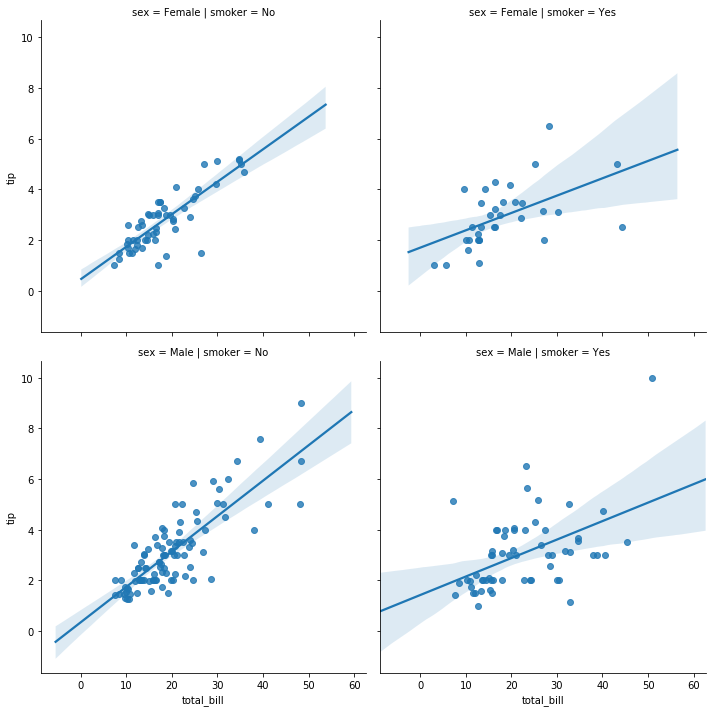

In [11]:
# x e y específican los atributos que se codificaran en los gráficos de dispersión
# col y row son análogos a su uso en FacetGrid para crear la matriz
# y data específica el dataset a utilizar
g = sns.lmplot(x="total_bill", y="tip", col="smoker", row="sex", data=dataset_comidas)

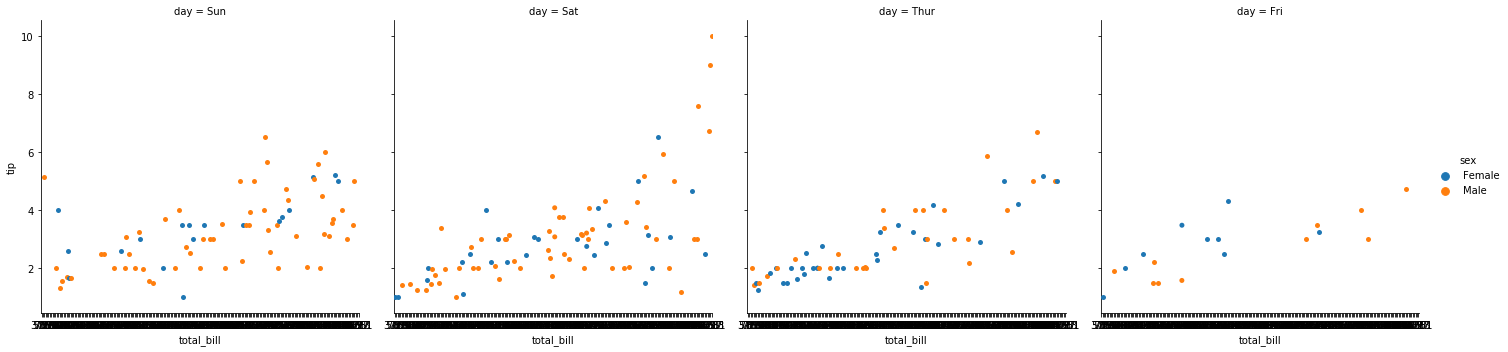

In [18]:
# Por defecto catplot utiliza el strip-plot, pero permite otras visualizaciones
# x e y específican los atributos que se codificaran en los gráficos
# col y row son análogos a su uso en FacetGrid para crear la matriz
# y data específica el dataset a utilizar
g = sns.catplot(x="total_bill", y="tip", hue="sex", col="day", data=dataset_comidas)

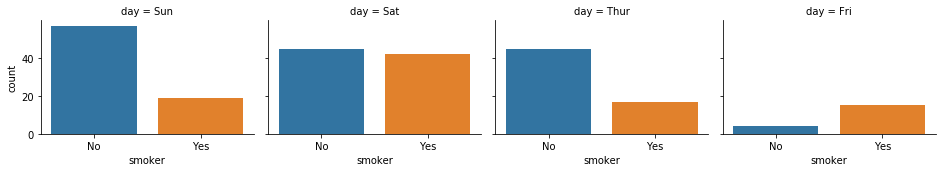

In [19]:
# Mediante kind="count" se utiliza un gráfico barra de conteo para atributos categóricos
# en este caso se específica el conteo para los valores de smoker, dividido en columnas por day
g = sns.catplot("smoker", data=dataset_comidas, kind="count", col="day", height=2.5, aspect=1.3)

## Matriz de gráficos de dispersión para combinaciones de atributos

Por otro lado, para crear una matriz de gráficos de dispersión para ver las relaciones entre distintas combinaciones de atributos numéricos, existe `pairplot`.

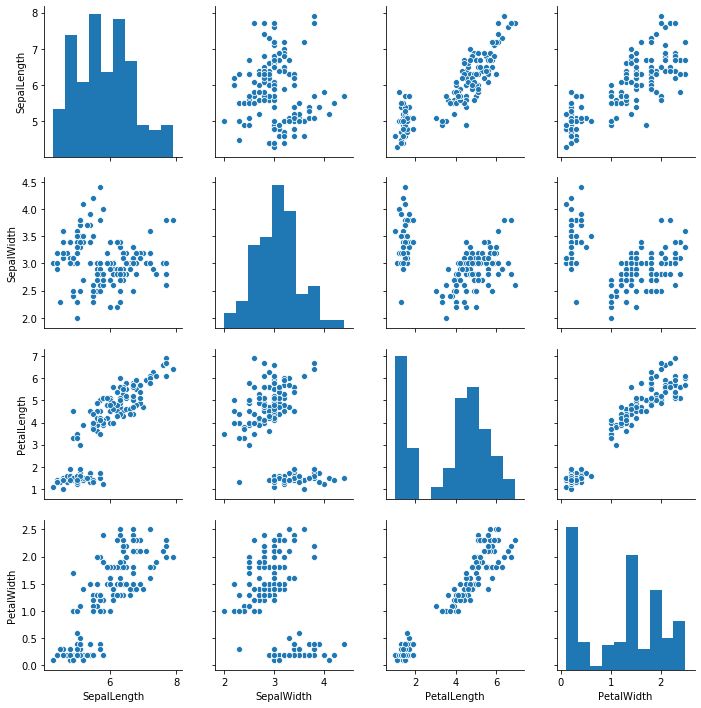

In [20]:
# Utilizar directamente la función pairplot que recibe un dataset como primer argumento
g = sns.pairplot(dataset_iris)

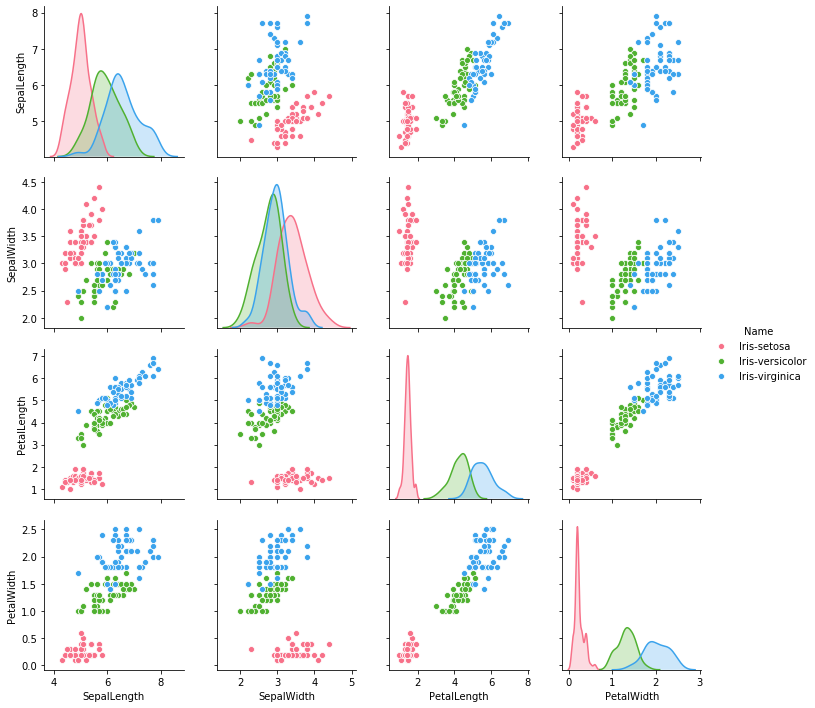

In [22]:
# Como la matriz generalmente es simetrica, podemos ahorrarnos una mitad con el parámetro corner
# y personalizar más codificación usando tonalidad de color (hue)
# y cambio de paleta (palette)
g = sns.pairplot(dataset_iris, hue="Name", palette="husl")

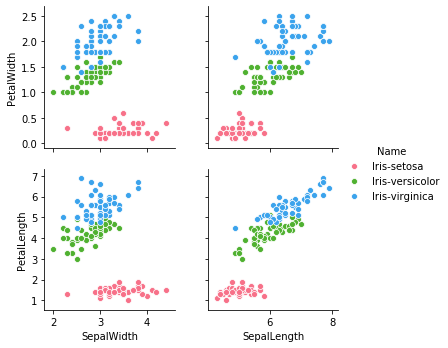

In [23]:
# Tal vez no se requiere ver todas las combinaciones de variables
# Se pueden específicar en x_vars y y_vars las variables a cruzar
g = sns.pairplot(dataset_iris, hue="Name", palette="husl",
                 x_vars=["SepalWidth", "SepalLength"],
                 y_vars=["PetalWidth", "PetalLength"])